On va considérer un jeu de données tabulaire contenant des logiciels dont certains sont des malwares.

Après avoir mené une analyse exploratoire des données, on créera un classifieur et mettant en oeuvre les démarches classiques de ML
(preprocessing, Crossvalidation, optimisation d'hyperparamètres, features importance).

+ Proposer une analyse exploratoire de données (ACP, clustering etc)
+ Entraîner 3 modèles : Regression Lasso (GridSearch), XGBoost (utiliser les valeurs SHAP pour comprendre les features importantes), un réseau fully-connect (utiliser tous les outils classiques d'optimisation d'entrainements, Neptuna)
+ Comparer les trois modèles !

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('file_pe_headers.csv')

In [17]:
df

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0


In [18]:
df.dtypes

Name                            object
e_magic                          int64
e_cblp                           int64
e_cp                             int64
e_crlc                           int64
                                 ...  
ImageDirectoryEntryExport        int64
ImageDirectoryEntryImport        int64
ImageDirectoryEntryResource      int64
ImageDirectoryEntryException     int64
ImageDirectoryEntrySecurity      int64
Length: 79, dtype: object

In [19]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Name[object],1. winhttp.dll2. VirusShare_a878ba26000edaac5c93. VirusShare_ef9130570fddc174b314. VirusShare_ef84cdeba22be72a69b5. VirusShare_6bf3608e60ebc16cbcf6. VirusShare_2cc94d952b2efb13c7d7. VirusShare_eff7676f69be2b519f38. VirusShare_e76cac211258723745f9. VirusShare_cef6cdf0e85303a461f10. VirusShare_59af5dfb0c79537eedd11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)19,601 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,e_magic[int64],1. 23117,"19,611 (100.0%)",,0(0.0%)
3,e_cblp[int64],Mean (sd) : 178.6 (987.2)min < med < max:0.0 < 144.0 < 59448.0IQR (CV) : 0.0 (0.2),39 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmN2yqbW2uHdwa21xPp9npZSh1nr3xfh33nvvp58WPwF79y3yrjldnwAAAABJRU5ErkJggg=="">",0(0.0%)
4,e_cp[int64],Mean (sd) : 71.7 (1445.2)min < med < max:0.0 < 3.0 < 63200.0IQR (CV) : 0.0 (0.0),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/TejxPPwpeLodZal+v1+nkYhtWU4YfD4bXW+iJWHnXtizofhmG13W6P4zie7hncWlvsdrvVfr+fl1KEykOu/vpLKWUcx9Nms3mbMH854Qx84zFFBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEmN2yqbW2uHdwa21xPp9npZSh1nr3xfh33nvvp58WPwF79y3yrjldnwAAAABJRU5ErkJggg=="">",0(0.0%)
5,e_crlc[int64],Mean (sd) : 49.1 (1212.2)min < med < max:0.0 < 0.0 < 64613.0IQR (CV) : 0.0 (0.0),26 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/P9b71AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABaUlEQVR4nO3XT2oCMRiH4aSI6GYGETyMh+hhewhvIyUuqi1Iuuum1D/jov3R59km+cjiZYbU3nuBv+7pty8At5hd21BrXZZS5hPnf/Te

In [20]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:13 -> (00:00 left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Je vous laisserai mener votre propre Analyse Exploratoire de Données et m'en proposer une !

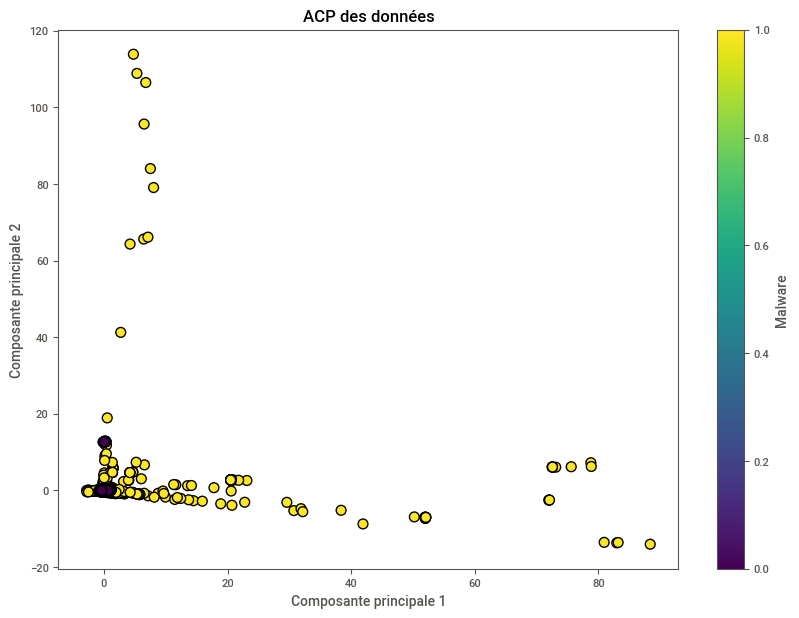

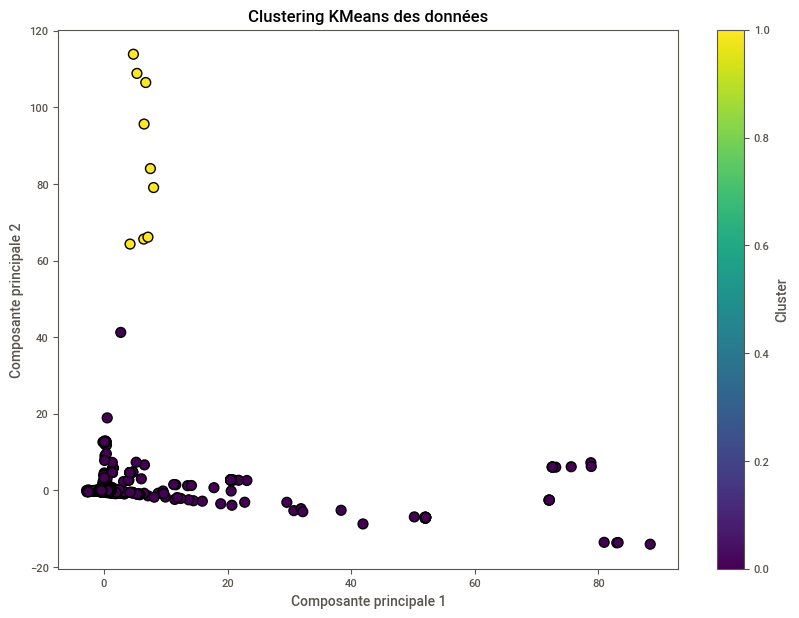

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardisation des données
X = df.drop(["Name", "Malware"], axis=1).to_numpy()  # Ensure X is defined
y = df["Malware"]  # Ensure y is defined
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Analyse en composantes principales (ACP)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Affichage des résultats de l'ACP
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('ACP des données')
plt.colorbar(label='Malware')
plt.show()

# Clustering avec KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Affichage des résultats du clustering
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Clustering KMeans des données')
plt.colorbar(label='Cluster')
plt.show()

In [22]:
y = df["Malware"]
X = df.drop(["Name", "Malware"], axis=1).to_numpy()

In [23]:
X

array([[2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 7.78240e+04,
        7.37280e+04, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 2.94912e+05,
        0.00000e+00, 3.46112e+05],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 4.09600e+04,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.31170e+04, 0.00000e+00, 0.00000e+00, ..., 6.14400e+04,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 1.02400e+05,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 5.57056e+05,
        0.00000e+00, 0.00000e+00]])

In [24]:
y

0        1
1        1
2        1
3        1
4        1
        ..
19606    0
19607    0
19608    0
19609    0
19610    0
Name: Malware, Length: 19611, dtype: int64

In [25]:
y.value_counts()

Malware
1    14599
0     5012
Name: count, dtype: int64

In [26]:
14590/len(X)*100

74.39702207944521

On peut remarquer que les classes ne sont pas très équilibrées !

Un classifieur naïf qui prédirait toujours 1 (non malveillant) ferait 74.39 % de bonnes réponses. On va voir si on peut faire mieux !

# Modélisation

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## XGBoost

In [28]:
from xgboost import XGBClassifier
import xgboost

XGB_model_instance = XGBClassifier()
XGB_model_instance.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
y_test_pred = XGB_model_instance.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: %.2f%%" % (accuracy * 100))

Accuracy: 99.34%


In [31]:
import shap

In [32]:
# Fits the explainer
explainer = shap.Explainer(XGB_model_instance.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer:  79%|███████▊  | 4623/5884 [06:02<01:40, 12.58it/s]


KeyboardInterrupt: 

In [ ]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.beeswarm(shap_values)

Explorer de la même manière la librairie LIME

# Comparons à un réseau de neurones

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=128)

In [ ]:
model.evaluate(X_test, y_test)